# Deflection of a photon by a Black Hole

Let's consider the case of a compact, static (non-rotating), spherically symmetric lens and compare its deflection angle in the strong field limit to the result derived in the weak field limit. 
![alt text](data/bozza.png)

The generic form of the metric for a spherically symmetric mass distribution is:
$$
ds^2=A(R)dt^2-B(R)dr^2-C(R)(d\theta^2+\sin^2\theta d\phi^2)
$$

[V. Bozza (2009)](http://arxiv.org/pdf/0911.2187v2.pdf) shows that the deflection angle of a photon with impact parameter $u$ (incoming and outgoing trajectories), passing at the minimum distance $R_m$ from the lens is:
$$
\hat\alpha(u)=-\pi+{2G}{c^2}\int_{R_m}^{\infty}u\sqrt{\frac{B(R)}{C(R)[C(R)/A(R)-u^2]}}dR \;.
$$

For the Schwarzchild metric (static, non-rotating, compact lens):
$$
A(R)=1-\frac{2GM}{c^2R}\;,
$$
$$
B(R)=A(R)^{-1} \;,
$$
and
$$
C(R)=R^2 \;.
$$

Using this metric, the formula for the deflection angle is (C. Darwin, 1959):
$$
\hat{\alpha}=-\pi+4\frac{G}{c^2}\sqrt{R_m/s}F(\varphi,m)
$$
with
\begin{eqnarray}
s&=&\sqrt{(R_m-2M)(R_m+6M)} \\
m&=&(s-R_m+6M)/2s \\
\varphi &=& \arcsin{\sqrt{2s/(3R_m-6M+s)}}
\end{eqnarray}

$F(\varphi,m)$ is the elliptical integral of the first kind. The impact parameter $u$ is related to  $R_m$ via the equation.
$$
u^2=\frac{C(R_m)}{A(R_m)}
$$

In this example we will implement the formula above and we will compare the resulting deflection angle to 
$$
\hat\alpha=\frac{4GM}{c^2u} \;.
$$


We will need some special function from scipy in order to compute the elliptic integral of the first kind. See https://docs.scipy.org/doc/scipy/reference/special.html.

In [1]:
# need special functions for incomplete elliptic integrals of the first kind
from scipy import special as sy 
import numpy as np
import matplotlib.pyplot as plt

2.5980762113533156 2.598076211353316


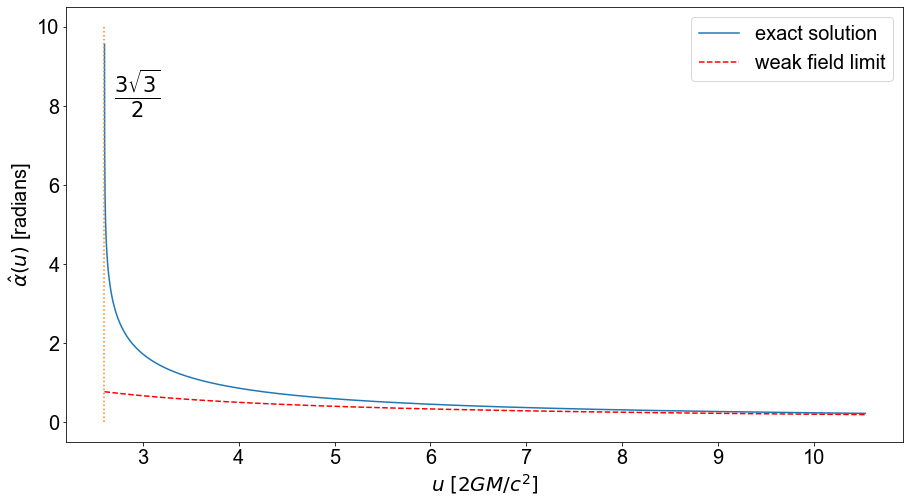

In [2]:
# our goal is to produce a graph. Let's setup the fonts and the character size
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

# build a class for BH objects
class point_bh:
    
    def __init__(self,M):
        self.M=M
    
    # functions which define the metric. We need only A(r) and C(r) to compute u from rm
    def A(self,r):
        return(1.0-2.0*self.M/r)
    
    def B(self,r):
        return (self.A(r)**(-1))
    
    def C(self,r):
        return(r**2)
    
    # compute u from rm
    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)
    
    # functions concurring to the deflection angle calculation
    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))
    
    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)
    
    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))
    
    # the deflection angle
    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) ## using the ellipkinc function from scipy.special
        return(-np.pi+4.0*np.sqrt(r/s)*F)

# build a class for point mass lenses implementing the results in the weak field limit    
class point_mass:
    
    def __init__(self,M):
        self.M=M
    
    # the classical formula
    def defAngle(self,u):
        return(4.0*self.M/u)
    

# construct a BH and a PM objects. The mass is fixed to 3 Msun (Rs=9km)
bh=point_bh(3.0)
pm=point_mass(3.0)

# initialize rm and compute u
r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M
u=bh.u(r)/2.0/bh.M
print (u.min(), 3.0*np.sqrt(3)/2.0)

# compute the deflection angles for the two lenses
a=bh.defAngle(r)
b=pm.defAngle(u*2.0*bh.M)

# plot the results
fig,ax=plt.subplots(1,1,figsize=(15,8)) # Create a figure and a set of subplots (1x1 subplots). 
                                        # Specify the size (in inches)
ax.plot(u,a,'-',label='exact solution') # plot the curve for the exact solution in ax
ax.plot(u,b,'--',label='weak field limit',color='red') # plot the curve for the weak field limit in ax
ax.set_xlabel(r'$u$ $[2GM/c^2]$') # set label on the x-axis
ax.set_ylabel(r'$\hat\alpha(u)$ [radians]') # set label on the y-axis
ax.legend() # display the legend

# plot a vertical dotted line at u=3\sqrt(3)/2M
x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,':')
ax.text(u.min()+0.1,8.0,r'$\frac{3\sqrt{3}}{2}$',fontsize=30)
fig.savefig('data/bhalpha.png')

An example of lensing by a Black Hole is the first image of a black hole itself (or rather of the shadow of its event horizon). This is visible in the image taken by the Event Horizon Telescope in the center of M87. The glowing gas in the accretion disc around the black hole is seen distorted by the gravitational lensing effects. In particular, nearest to the BH, photons rings are formed that are originated by photons looping several times arount the lens mass before escaping to us. In addition, lensing distorts the shape of the back side of the disk, allowing to see even the underside of it.

![alt text](data/bh_labeled.jpg)

![alt text](data/eso1907a.jpg)

# Deflection by an ensemble of point masses

Using the linear dependence of the deflection angle on mass, we can use the superposition principle to compute the deflection angle of a light ray by an ensemble of point masses:

$$
\hat{\vec\alpha}(\xi)=\frac{4G}{c^2}\sum_i \frac{M_i}{|\vec\xi-\vec\xi_i|^2}(\vec\xi-\vec\xi_i)
$$

In the following example, we consider a random distribution of point masses and compute the direction and versus of the deflection angle vector of a light ray at the center of the lens plane.

For the moment, we can assume that all masses are equal. In addition, the deflection angle vector is scaled in such a way that its length is 0.1.

You can try to

* set the number of lenses to n=1. What are the direction and versus of $\hat{\vec\alpha}$?
* increase the number of lenses to see how the deflection angle changes.

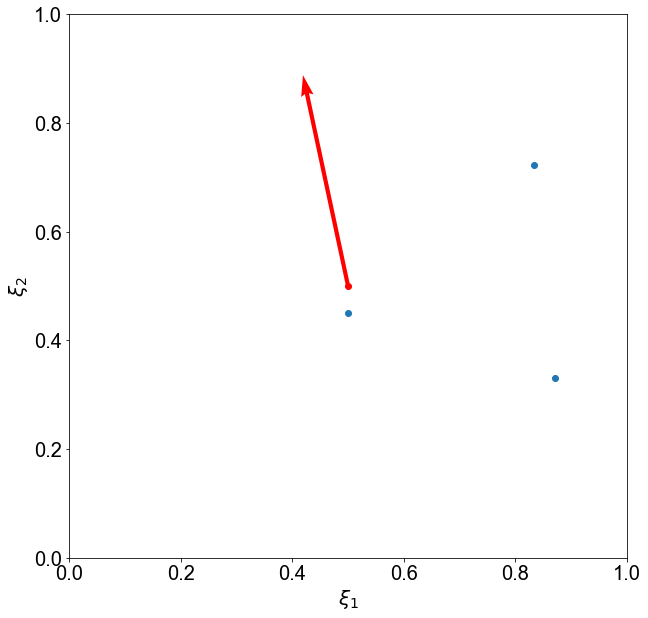

In [27]:
# generate a random distribution of point masses
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rn
from astropy import constants as const
from astropy import units as u


# number of point lenses: you can play with this number!
n=1


#################
# distribute lenses at random positions in a region of 1pc x 1pc
xi_1=rn.rand(n)*u.pc
xi_2=rn.rand(n)*u.pc

# assign to all lenses the same mass (1 Msun)
m=np.ones(n)*const.M_sun.to('kg')

# now set the ray position at (0.5pc,0.5pc)
xi_1r=0.5*u.pc
xi_2r=0.5*u.pc

# compute distances from xr,yr
xi1=(xi_1r-xi_1).to('m')
xi2=(xi_2r-xi_2).to('m')

#print ((4.0*const.G/const.c**2*m/const.R_sun)*u.rad.to('arcsec'))#180.0/np.pi*3600.0)

rl2=(xi1**2+xi2**2).to('m2')

al1=(4.0*const.G/const.c**2*m/rl2*xi1).sum().value
al2=(4.0*const.G/const.c**2*m/rl2*xi2).sum().value
f=1e10#1e-2/np.sqrt(al1**2+al2**2)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(xi_1,xi_2,'o',zorder=-1)
ax.plot(xi_1r,xi_2r,'o',color='red')
ax.quiver(xi_1r.value, xi_2r.value, al1*f, al2*f, color='r', scale=0.1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r'$\xi_1$',fontsize=20)
ax.set_ylabel(r'$\xi_2$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


In the next example, we generate many light rays and try to compute the deflection angle of each of them due to the distribution of $n$ lenses. Try to increase the number of the lenses and rays and see how the computational time increases. 

time of execution: 0.021406888961791992


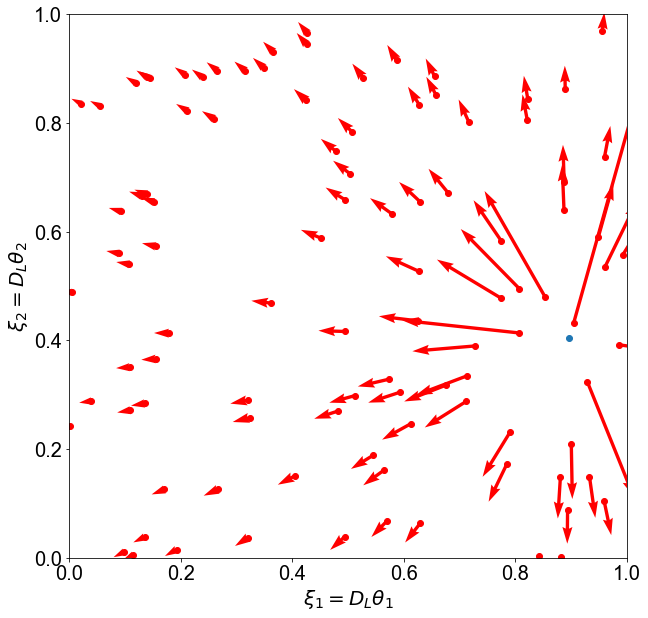

In [31]:
import time
# generate a random distribution of point masses
t1 = time.time()

import numpy.random as rn

n=1
xi_1=rn.rand(n)
xi_2=rn.rand(n)
m=np.ones(n)*const.M_sun.to('kg')

# now define the light ray positions
nr=100
xi_1r=rn.rand(nr)
xi_2r=rn.rand(nr)

fig,ax=plt.subplots(1,1,figsize=(10,10))
xi1 = np.array([[xi_1r[i]-xi_1[k] for i in range(nr)] for k in range(n)])
xi2 = np.array([[xi_2r[i]-xi_2[k] for i in range(nr)] for k in range(n)])

rl2=(xi1**2+xi2**2)*u.pc.to('m')
mass=np.array([m,]*nr).transpose()
al1=4.0*const.G/const.c**2*((mass/rl2*xi1).sum(axis=0))
al2=4.0*const.G/const.c**2*((mass/rl2*xi2).sum(axis=0))

al1=np.array(al1)
al2=np.array(al2)
f=1e10#1.e-2/np.sqrt(al1**2+al2**2)
print ("time of execution:", time.time() - t1)

ax.plot(xi_1,xi_2,'o',zorder=-1)
ax.plot(xi_1r,xi_2r,'o',color='red')
ax.quiver(xi_1r, xi_2r, al1*f, al2*f, color='r', scale=0.1)    
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r'$\xi_1=D_L\theta_1$',fontsize=20)
ax.set_ylabel(r'$\xi_2=D_L\theta_2$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Angular diameter distances

The distances which appear in many of the lensing formulas are angular diameter distances. For example, deriving the lens equation, we have used the relations:

$$ 
\xi=D_L\theta
$$

or 

$$
\eta=D_S\beta
$$

to define the physical scales in the lens and on the source planes.

Let's learn by experience how this distance works.

In [32]:
# define a cosmological framework:
from astropy.cosmology import FlatLambdaCDM

co=FlatLambdaCDM(H0=70,Om0=0.3)

zl=1#e-6
zs=2#e-6
dl=co.angular_diameter_distance(zl)
ds=co.angular_diameter_distance(zs)
dls=co.angular_diameter_distance_z1z2(zl,zs)
print ('Distance to the lens: %8.4f Mpc' % dl.value)
print ('Distance to the source: %8.4f Mpc' % ds.value)
print ('Distance between the lens and the source #1: %8.4f Mpc' % (ds-dl).value)
print ('Distance between the lens and the source #2: %8.4f Mpc' % dls.value)

Distance to the lens: 1651.9144 Mpc
Distance to the source: 1726.6207 Mpc
Distance between the lens and the source #1:  74.7063 Mpc
Distance between the lens and the source #2: 625.3444 Mpc


Text(0, 0.5, 'Angular Diameter Distance [Mpc]')

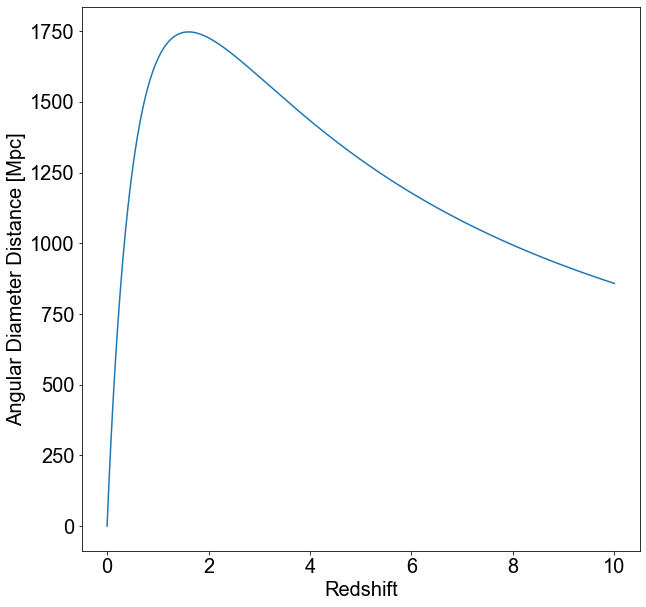

In [33]:
import numpy as np
z=np.linspace(0.0,10.,1000)
dz=co.angular_diameter_distance(z)
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(z,dz,'-')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular Diameter Distance [Mpc]')